In [263]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime

import matplotlib.pyplot as plt 
%matplotlib inline

In [264]:
df = pd.read_excel("/Users/komori/Desktop/MA data/Critic_Review.xlsx", index_col=0, parse_dates=["review_date"])
df.head()

,review_id,review_date,review_score,content
1,GameMAG,2020-09-13,90.0,The Last of Us Part II is the high point of th...
2,PLAY! Zine,2020-09-05,93.0,Not everyone is going to enjoy the motives of ...
3,Game World Navigator Magazine,2020-09-03,75.0,If you loved the original for its great charac...
4,CD-Action,2020-08-10,100.0,"Prepare for anger, fear, pain and disappointme..."
5,LEVEL (Czech Republic),2020-07-22,80.0,"Brave, brutal, dark. The Last of Us 2 is not f..."


In [265]:
df.iloc[[1,2]]

,review_id,review_date,review_score,content
2,PLAY! Zine,2020-09-05,93.0,Not everyone is going to enjoy the motives of ...
3,Game World Navigator Magazine,2020-09-03,75.0,If you loved the original for its great charac...


<Figure size 1440x720 with 0 Axes>

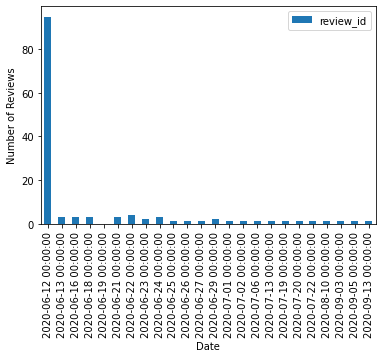

In [266]:
date_dstb = df.groupby("review_date")
plt.figure(figsize=(20,10))
date_dstb.count()[["review_id"]].plot.bar()
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

plt.savefig('/Users/komori/Desktop/MA data/critic_review_time_distribution.png')

plt.show()


# critic review number distribution along w time

<Figure size 1080x720 with 0 Axes>

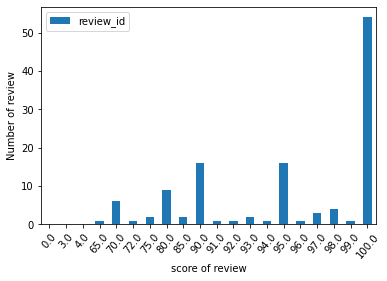

In [267]:
score = df.groupby("review_score")
# score.count()[["review_id"]] 
# can show the dameframe of the list: score w/ # of reviews

plt.figure(figsize=(15,10))
score.count()[["review_id"]].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("score of review")
plt.ylabel("Number of review")

plt.savefig('/Users/komori/Desktop/MA data/critic_review_score_distribution.png')

plt.show()

# critic review score distribution

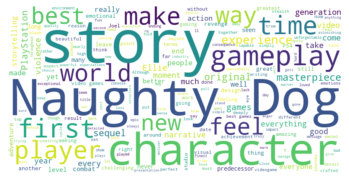

In [268]:
# wordcloud 1: for all critic reviews 

text = " ".join(review for review in df.content)
stopwords = set(STOPWORDS)
stopwords.update(["game","Last","Us","Part","II","will","play","s","one","even"])
wordcloud = WordCloud(stopwords = stopwords, background_color="white", width = 800, height = 400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/komori/Desktop/MA data/critic_review.png")

In [269]:
df = pd.read_excel("/Users/komori/Desktop/MA data/user_review.xlsx", parse_dates=["date"])
df.head()

,username,reviewcontent,userscore,date,helpful
0,themadlad01,This game is a slap to the face of the fans of...,2,2020-11-15,150\n\t\t\t\tof \n\t\t\t\t220\n\t\t\t\tusers f...
1,POW15,As someone who was a big fan of the Last of Us...,2,2020-06-30,167\n\t\t\t\tof \n\t\t\t\t245\n\t\t\t\tusers f...
2,tourist27,I bet gamers in 2100 will laugh their ass off ...,2,2020-10-31,172\n\t\t\t\tof \n\t\t\t\t254\n\t\t\t\tusers f...
3,lastofreviews,"I'll be honest now, first 20 minutes (or howev...",1,2020-11-22,161\n\t\t\t\tof \n\t\t\t\t240\n\t\t\t\tusers f...
4,Bucketanarchy,To say I didn't like it would be insulting any...,0,2020-06-20,189\n\t\t\t\tof \n\t\t\t\t282\n\t\t\t\tusers f...


<Figure size 2160x720 with 0 Axes>

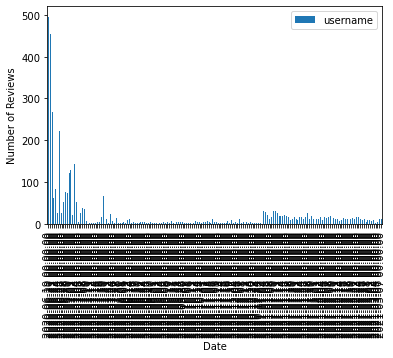

In [270]:
date_dstb = df.groupby("date")
plt.figure(figsize=(30,10))
date_dstb.count()[["username"]].plot.bar()
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

plt.savefig('/Users/komori/Desktop/MA data/user_review_time_distribution.png')

plt.show()


# user review number distribution along w time

<Figure size 1080x720 with 0 Axes>

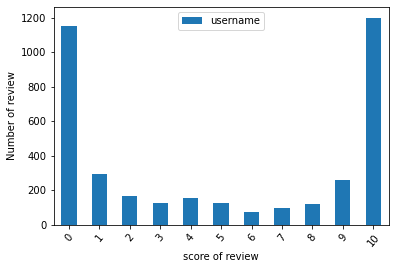

In [271]:
score = df.groupby("userscore")
# score.count()[["review_id"]] 
# can show the dameframe of the list: score w/ # of reviews

plt.figure(figsize=(15,10))
score.count()[["username"]].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("score of review")
plt.ylabel("Number of review")

plt.savefig('/Users/komori/Desktop/MA data/user_review_score_distribution.png')

plt.show()

# user review score distribution

In [272]:
len(df)

3774

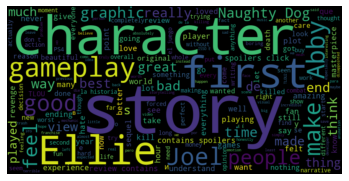

In [273]:
# wordcloud 2: for all user reviews 

text = " ".join(str(review) for review in df.reviewcontent)
stopwords = set(STOPWORDS)
stopwords.update(["game","Last","Us","Part","II","will","play","one","even","Expand"])
wordcloud = WordCloud(stopwords = stopwords, background_color="black", width = 800, height = 400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/komori/Desktop/MA data/user_review.png")

In [274]:
review_0 = df[df["userscore"] == 0]
review_10 = df[df["userscore"] == 10]


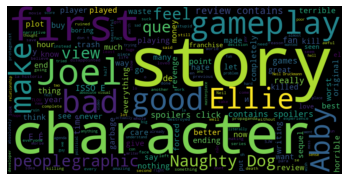

In [275]:
# wordcloud 3: for all 0 point user reviews 

text = " ".join(str(review) for review in review_0.reviewcontent)
stopwords = set(STOPWORDS)
stopwords.update(["game","Last","Us","Part","II","will","play","s","one","even","Expand"])
wordcloud = WordCloud(stopwords = stopwords, background_color="black",width = 800, height = 400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/komori/Desktop/MA data/user_review_0.png")

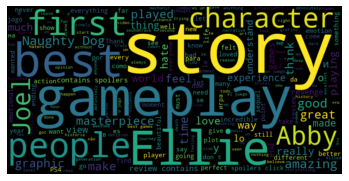

In [276]:
# wordcloud 4: for all 10 point user reviews 

text = " ".join(str(review) for review in review_10.reviewcontent)
stopwords = set(STOPWORDS)
stopwords.update(["game","Last","Us","Part","II","will","play","s","one","even","Expand","que","de","e"])
wordcloud = WordCloud(stopwords = stopwords, background_color="black",width = 800, height = 400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/komori/Desktop/MA data/user_review_10.png")